<a href="https://colab.research.google.com/github/bhnunes/FT043/blob/main/Atividade_5/Atividade_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O estudo da eficácia de vacinas é feito por meio análises estatísticas sobre dados obtidos a partir de uma fase de experimentação da
vacina. Neste projeto, o objetivo é verificar se uma vacina para uma determinada doença é eficaz. A análise deverá ser feita
considerando dados que representam uma métrica de imunidade, representada por M, à doença alvo. Tal métrica de imunidade varia
de 0 a 1000, sendo que M = 0 significa ausência total de imunidade, enquanto M = 1000 é imunidade total à doença em questão.
Para cada um dos grupos, serão disponibilizados os seguintes dados:

In [43]:
import pandas as pd
import numpy as np

In [44]:
db_controle='https://raw.githubusercontent.com/bhnunes/FT043/refs/heads/main/Atividade%205/M_controle.csv'
db_tratamento='https://raw.githubusercontent.com/bhnunes/FT043/refs/heads/main/Atividade%205/M_tratamento.csv'

• M_controle → Conjunto de dados que representam a métrica M para um grupo de pessoas que não tomaram a vacina (grupo
de controle)

• M_tratamento → Conjunto de dados que representam a métrica M para um grupo de pessoas que tomaram a vacina (grupo
de tratamento)

In [45]:
dfMedidas_controle=pd.read_csv(db_controle,delimiter='.', decimal=',')
dfMedidas_controle=dfMedidas_controle.dropna(axis=1,how='all')

dfMedidas_tratamento=pd.read_csv(db_tratamento,delimiter='.', decimal=',')
dfMedidas_tratamento=dfMedidas_tratamento.dropna(axis=1,how='all')

Calculando a média e desvio padrão para ambos os dataframes:

In [46]:
dfMedidas_controle.describe()

,MEDIDA
count,20000.000000
mean,399.523565
std,79.741701
min,61.332881
25%,346.010721
50%,400.193086
75%,453.304198
max,741.727203


In [47]:
dfMedidas_tratamento.describe()

,MEDIDA
count,100.000000
mean,548.259199
std,73.109874
min,321.381925
25%,495.274829
50%,544.227113
75%,599.675100
max,732.648201


In [48]:
media_controle=dfMedidas_controle.mean()
std_controle=dfMedidas_controle.std()

media_tratamento=dfMedidas_tratamento.mean()
std_tratamento=dfMedidas_tratamento.std()

(a) Trace, numa mesma figura, os box-plots dos dois conjuntos de dados fornecidos.

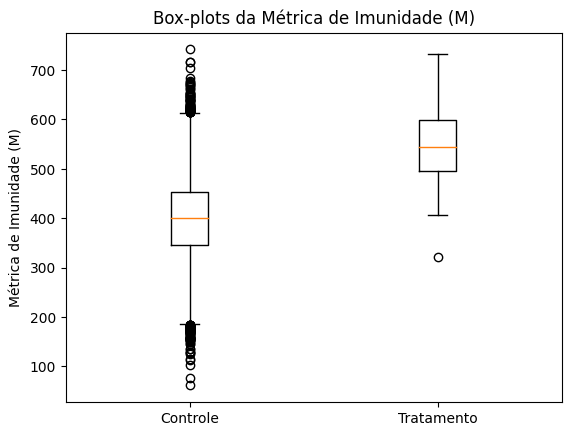

In [49]:
import matplotlib.pyplot as plt

# Criando a figura e os eixos
fig, ax = plt.subplots()

# Criando os boxplots para ambos os conjuntos de dados
ax.boxplot([dfMedidas_controle['MEDIDA'], dfMedidas_tratamento['MEDIDA']], labels=['Controle', 'Tratamento'])

# Adicionando título e rótulos aos eixos
ax.set_title('Box-plots da Métrica de Imunidade (M)')
ax.set_ylabel('Métrica de Imunidade (M)')

# Exibindo a figura
plt.show()

Podemos ver que o grupo de tratamento apresenta uma média de métrica de imunidade maior que a do grupo de controle.

(b) Realize, a partir de um teste de hipótese, uma análise sobre a eficácia da vacina. Para fins deste projeto, entende-se por eficácia
a capacidade da vacina aumentar a métrica de imunidade M. Discuta se, a partir dos resultados obtidos, é possível dizer se a vacina
em fase de teste se mostra eficaz.

**Hipótese nula (H0):** A média da métrica de imunidade é igual nos dois grupos.


**Hipótese alternativa (H1):** A média da métrica de imunidade é maior no grupo de tratamento.

In [50]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(dfMedidas_tratamento['MEDIDA'], dfMedidas_controle['MEDIDA'], equal_var=False)

print(f"Estatística t: {t_statistic}")
print(f"Valor p: {p_value}")

alpha = 0.05  # Nível de significância

if p_value < alpha:
    print("A hipótese nula é rejeitada. A vacina parece ser eficaz em aumentar a métrica de imunidade M.")
else:
    print("A hipótese nula não é rejeitada. Não há evidência suficiente para concluir que a vacina é eficaz.")


Estatística t: 20.283886548282307
Valor p: 2.9829224982403932e-37
A hipótese nula é rejeitada. A vacina parece ser eficaz em aumentar a métrica de imunidade M.


# Discussão:
O teste t de Student foi usado para comparar as médias das métricas de imunidade entre os grupos de tratamento e controle.

Se o valor p for menor que o nível de significância (alpha), rejeitamos a hipótese nula e concluímos que há uma diferença significativa entre as médias dos dois grupos. Isso sugere que a vacina tem um efeito positivo na métrica de imunidade.
Caso contrário, não há evidência suficiente para rejeitar a hipótese nula, e não podemos concluir que a vacina é eficaz.

É importante lembrar que este é apenas um teste estatístico e que outros fatores podem influenciar a eficácia da vacina.
Um estudo mais completo deve incluir uma análise mais detalhada dos dados e considerar outros fatores relevantes